In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter, WeekdayLocator , MonthLocator

<Axes: >

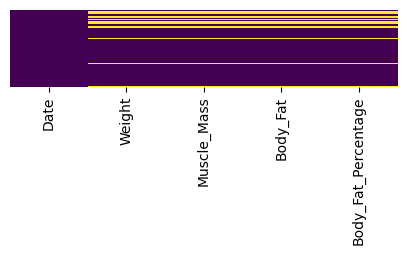

In [2]:
inbody_df = pd.read_csv('inbody.csv')
inbody_df = inbody_df.drop(columns=['Visceral_Fat','BMI'])

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # 禁用換行

inbody_df = pd.read_csv('inbody.csv')
inbody_df = inbody_df.drop(columns=['Visceral_Fat','BMI'])

#探索資料
plt.figure(figsize=(5, 1))
sns.heatmap(inbody_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [3]:
print(inbody_df.head(5))

#檢查離奇數值
col_filter = 'Muscle_Mass'
std_range = 3
std_value = inbody_df[col_filter].std()
mean_value = inbody_df[col_filter].mean()
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)

# 移除
inbody_df.loc[errorData.index,col_filter] = None
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)

#檢查離奇數值
col_filter = 'Body_Fat'
std_range = 3
std_value = inbody_df[col_filter].std()
mean_value = inbody_df[col_filter].mean()
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)


    Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
0  05/09    67.2         28.5      16.1                 23.9
1  05/10    66.9         28.3      16.4                 24.5
2  05/11    66.7         27.9      16.9                 25.4
3  05/12    66.7         28.7      15.6                 23.4
4  05/13     NaN          NaN       NaN                  NaN
      Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
187  11/12    62.5         17.4      13.6                 21.7
Empty DataFrame
Columns: [Date, Weight, Muscle_Mass, Body_Fat, Body_Fat_Percentage]
Index: []
Empty DataFrame
Columns: [Date, Weight, Muscle_Mass, Body_Fat, Body_Fat_Percentage]
Index: []


    Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
0  05/09   67.20         28.5      16.1                 23.9
1  05/10   66.90         28.3      16.4                 24.5
2  05/11   66.70         27.9      16.9                 25.4
3  05/12   66.70         28.7      15.6                 23.4
4  05/13   67.25         28.4      16.7                 24.8


C:\Users\Tim\AppData\Local\Temp\ipykernel_21116\4062111297.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inbody_df = inbody_df.interpolate(method='linear', axis=0)#內插資訊


<Axes: >

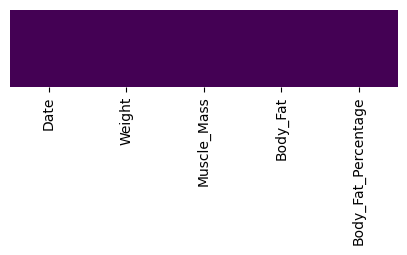

In [4]:
inbody_df = inbody_df.interpolate(method='linear', axis=0)#內插資訊
print(inbody_df.head(5))

#探索資料
plt.figure(figsize=(5, 1))
sns.heatmap(inbody_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#正規化
def normalize_dataframe(df, col):
    to_normalize = scaler.fit_transform(df[[col]]) 
    df[col] = to_normalize

scaler = MinMaxScaler()

normalize = inbody_df

normalize_dataframe(normalize,'Weight')
normalize_dataframe(normalize,'Muscle_Mass')
normalize_dataframe(normalize,'Body_Fat')
normalize_dataframe(normalize,'Body_Fat_Percentage')

print(normalize)


      Date    Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage
0    05/09  0.900000     0.758621  0.689189             0.636364
1    05/10  0.850000     0.689655  0.729730             0.696970
2    05/11  0.816667     0.551724  0.797297             0.787879
3    05/12  0.816667     0.827586  0.621622             0.585859
4    05/13  0.908333     0.724138  0.770270             0.727273
..     ...       ...          ...       ...                  ...
212  12/07  0.066667     0.655172  0.094595             0.121212
213  12/08  0.116667     0.482759  0.270270             0.323232
214  12/09  0.116667     0.482759  0.270270             0.323232
215  12/10  0.116667     0.482759  0.270270             0.323232
216  12/11  0.116667     0.482759  0.270270             0.323232

[217 rows x 5 columns]


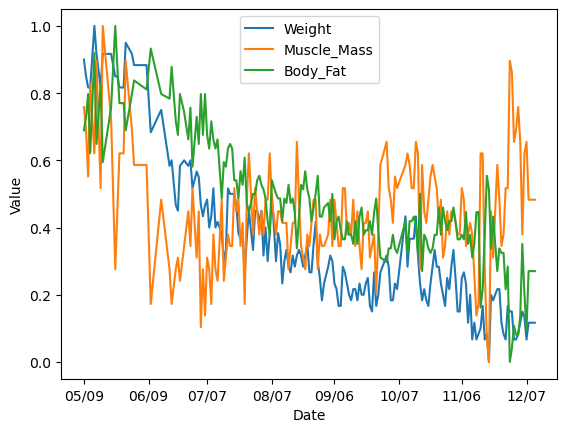

In [6]:
fig, ax = plt.subplots()
x = inbody_df["Date"]

# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(MonthLocator())

def scatter_by_label(df,col_x,col_y):
    plt.scatter(df[col_x],df[col_y],s=3,label=col_y)
    plt.xlabel(col_x)
    plt.ylabel(col_y)

def plot_by_label(df,col_x,col_y):
    plt.plot(df[col_x],df[col_y],label=col_y)
    plt.xlabel(col_x)
    plt.ylabel(col_y)

plot_by_label(normalize,'Date','Weight')
plot_by_label(normalize,'Date','Muscle_Mass')
plot_by_label(normalize,'Date','Body_Fat')

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 添加图例
ax.legend()
# 显示图形
plt.show()


    Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total
0  05/01     127.0          NaN      NaN             NaN         NaN                 NaN                NaN            7400.0
1  05/02       NaN          NaN      NaN            72.0         NaN              6175.0                NaN               NaN
2  05/03       NaN          NaN      NaN             NaN        81.0                 NaN             6066.0               NaN
3  05/04       NaN          NaN      NaN             NaN         NaN                 NaN                NaN               NaN
4  05/05       NaN          NaN      NaN             NaN         NaN                 NaN                NaN               NaN
5  05/06     127.0          NaN      NaN             NaN         NaN                 NaN                NaN            7780.0
6  05/07       NaN          NaN      NaN            86.0         NaN              7250.0                NaN           

<Axes: >

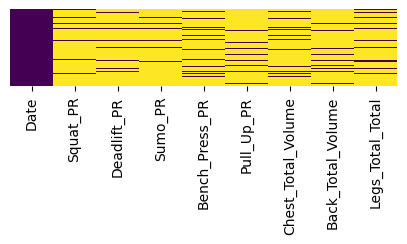

In [7]:
train_df = pd.read_csv('Train.csv')
pr_keys = ['Squat_PR','Deadlift_PR','Sumo_PR','Bench_Press_PR','Pull_Up_PR']

print(train_df.head(10))

#探索資料
plt.figure(figsize=(5, 1))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


    Date  Squat_PR  Deadlift_PR  Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total
0  05/01     127.0         74.0     90.0            72.0        81.0                 NaN                NaN            7400.0
1  05/02     127.0         74.0     90.0            72.0        81.0              6175.0                NaN               NaN
2  05/03     127.0         74.0     90.0            74.8        81.0                 NaN             6066.0               NaN
3  05/04     127.0         74.0     90.0            77.6        81.3                 NaN                NaN               NaN
4  05/05     127.0         74.0     90.0            80.4        81.6                 NaN                NaN               NaN
5  05/06     127.0         74.0     90.0            83.2        81.9                 NaN                NaN            7780.0
6  05/07     124.9         74.0     90.0            86.0        82.2              7250.0                NaN           

<Axes: >

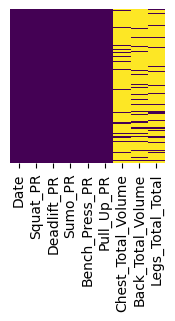

In [8]:
for pr_key in pr_keys:
    #內插資訊
    train_df[pr_key] = train_df[pr_key].interpolate(method='linear', axis=0)
    #補開頭
    train_df[pr_key].fillna(train_df[pr_key].ffill().bfill(), inplace=True)

print(train_df.head(10))

print(train_df.tail(10))

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


[0.00443185 0.02239453 0.07895016 0.19418605 0.3332246  0.39894228
 0.3332246  0.19418605 0.07895016 0.02239453 0.00443185]


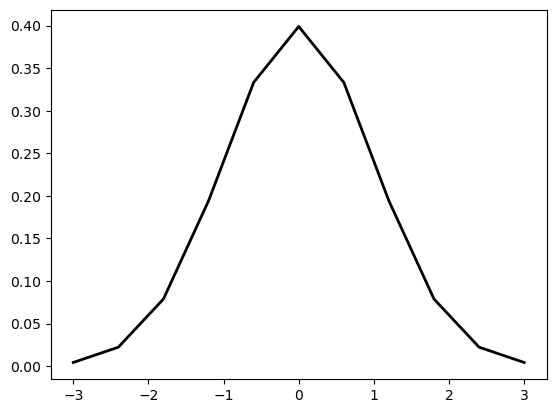

In [9]:
#常態分布
mean_value = 0
std_dev = 1
array_size = 11

x = np.linspace(mean_value - 3 * std_dev, mean_value + 3 * std_dev, array_size)
gd_ay = (1.0 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_value) / std_dev) ** 2)

plt.plot(x, gd_ay, 'k', linewidth=2)
print(gd_ay)

     Date    Squat_PR  Deadlift_PR     Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
0   05/01  127.000000        74.00   90.000000            72.0   81.000000         1022.929979         639.845436       3369.340855   5032.116270
1   05/02  127.000000        74.00   90.000000            72.0   81.000000         3064.131076        1004.873401       2105.265139   6174.269617
2   05/03  127.000000        74.00   90.000000            74.8   81.000000         1909.588871         636.809864       1425.534109   3971.932844
3   05/04  127.000000        74.00   90.000000            77.6   81.300000         1272.748818         439.735893       1435.130151   3147.614863
4   05/05  127.000000        74.00   90.000000            80.4   81.600000         1277.502262         468.468561       2510.464437   4256.435260
5   05/06  127.000000        74.00   90.000000            83.2   81.900000         1553.083075         503.716487       1648

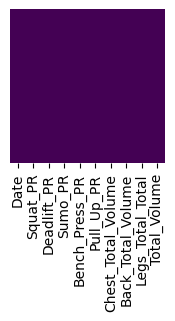

In [10]:
train_df['Total_Volume'] = train_df[['Chest_Total_Volume', 'Back_Total_Volume', 'Legs_Total_Total']].sum(axis=1)


#將訓練容量分散
def dispersion_Volume (col) :
    for i in range(len(train_df)) :
        val = train_df.loc[i, col]
        if val <= 0 or pd.isna(val):
            continue
        train_df.loc[i, col] = 0
        for j in range(-5,5) :
            addVal = gd_ay[j] * val 
            setIdx = i+j
            if setIdx < 0 or setIdx >= len(train_df) :
                continue
            if (pd.isna(train_df.loc[setIdx, col])):
                train_df.loc[setIdx, col] = 0
            train_df.loc[setIdx, col] += addVal

volume_kyes = ['Chest_Total_Volume','Back_Total_Volume','Legs_Total_Total','Total_Volume']
for volume_key in volume_kyes:
    dispersion_Volume(volume_key)

#探索資料
plt.figure(figsize=(2, 2))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#print("---")
print(train_df.head(30))


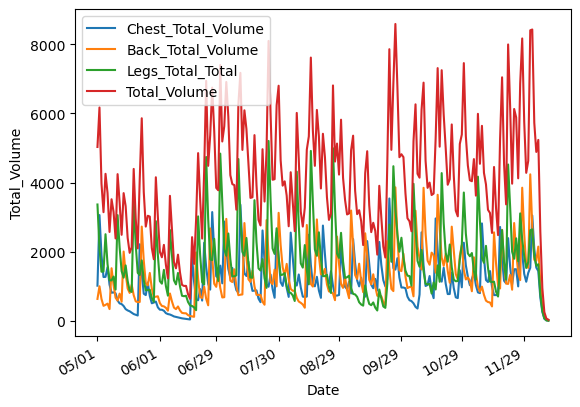

In [11]:
fig, ax = plt.subplots()
x = inbody_df["Date"]
ax.xaxis.set_major_locator(MonthLocator())

for volume_key in volume_kyes:
    plot_by_label(train_df,'Date',volume_key)
    
ax.legend()
fig.autofmt_xdate()

In [12]:
#正規化
normalize_train_df = train_df

for col in normalize_train_df.columns:
    if(col != 'Date'):  
        normalize_dataframe(normalize_train_df,col)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


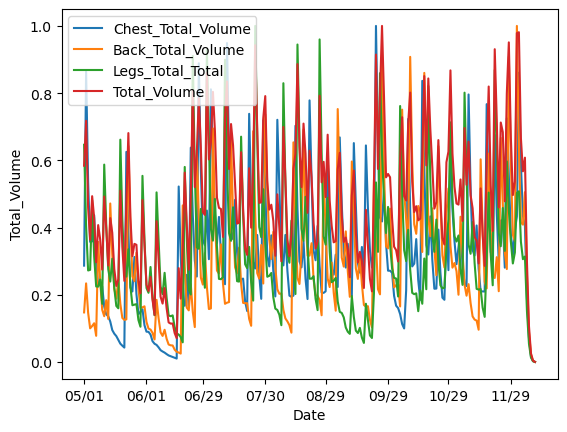

In [13]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MonthLocator())
ax.legend()
for volume_key in volume_kyes:
    plot_by_label(train_df,'Date',volume_key)

ax.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


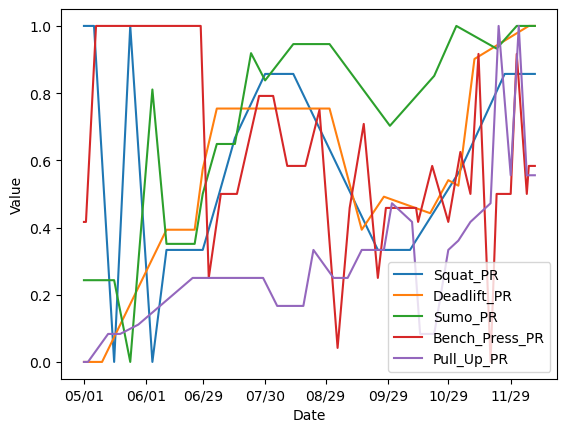

In [14]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MonthLocator())
ax.legend()

for pr_key in pr_keys:
    plot_by_label(train_df,'Date',pr_key)

plt.xlabel("Date")
plt.ylabel("Value")


ax.legend()
plt.show()

In [15]:
combine_df = pd.merge(inbody_df,train_df,on='Date',how='outer')
combine_df = combine_df.sort_values(by='Date').reset_index(drop=True)
combine_df = combine_df.iloc[8:]
print(combine_df.head(1))

#g = sns.PairGrid(combine_df)
#g.map(plt.scatter)

    Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage  Squat_PR  Deadlift_PR   Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
8  05/09     0.9     0.758621  0.689189             0.636364       0.7          0.0  0.243243             1.0        0.05            0.231603           0.241829          0.245394       0.36432


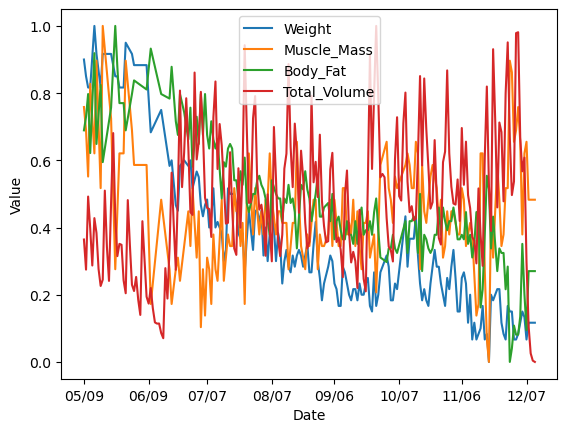

In [16]:
fig, ax = plt.subplots()
x = inbody_df["Date"]

# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(MonthLocator())

def scatter_by_label(df,col_x,col_y):
    plt.scatter(df[col_x],df[col_y],s=3,label=col_y)
    plt.xlabel(col_x)
    plt.ylabel(col_y)

def plot_by_label(df,col_x,col_y):
    plt.plot(df[col_x],df[col_y],label=col_y)
    plt.xlabel(col_x)
    plt.ylabel(col_y)

plot_by_label(combine_df,'Date','Weight')
plot_by_label(combine_df,'Date','Muscle_Mass')
plot_by_label(combine_df,'Date','Body_Fat')
plot_by_label(combine_df,'Date','Total_Volume')

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 添加图例
ax.legend()
# 显示图形
plt.show()

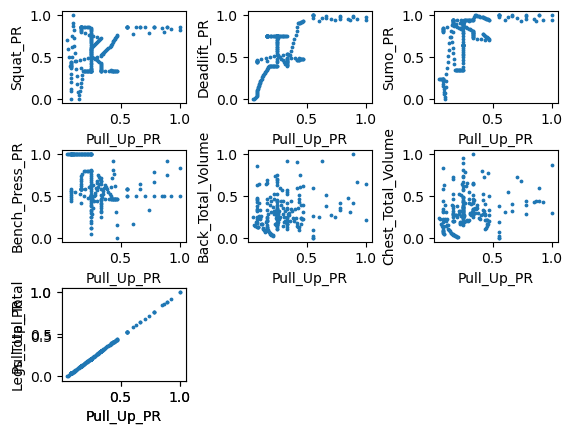

In [17]:
#'Pull_Up_PR' 跟 其他 PR 關係
fig = plt.figure()
fig.add_subplot(331)
scatter_by_label(combine_df, 'Pull_Up_PR','Squat_PR')
fig.add_subplot(332)
scatter_by_label(combine_df, 'Pull_Up_PR','Deadlift_PR')
fig.add_subplot(333)
scatter_by_label(combine_df, 'Pull_Up_PR','Sumo_PR')
fig.add_subplot(334)
scatter_by_label(combine_df, 'Pull_Up_PR','Bench_Press_PR')
fig.add_subplot(335)
scatter_by_label(combine_df, 'Pull_Up_PR','Back_Total_Volume')
fig.add_subplot(336)
scatter_by_label(combine_df, 'Pull_Up_PR','Chest_Total_Volume')
fig.add_subplot(337)
scatter_by_label(combine_df, 'Pull_Up_PR','Legs_Total_Total')
fig.add_subplot(337)
scatter_by_label(combine_df, 'Pull_Up_PR','Pull_Up_PR')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


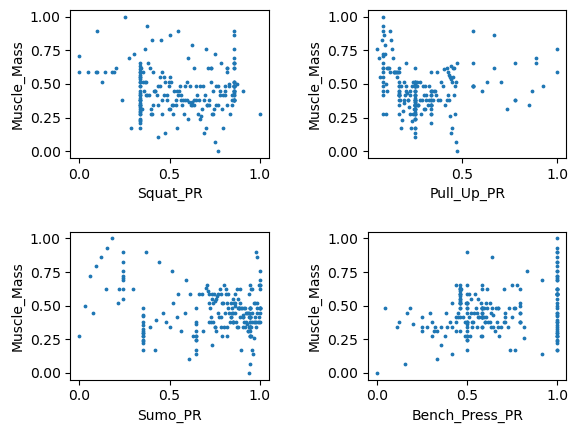

In [18]:
fig = plt.figure()
fig.add_subplot(221)
scatter_by_label(combine_df, 'Squat_PR','Muscle_Mass')
fig.add_subplot(222)
scatter_by_label(combine_df, 'Pull_Up_PR','Muscle_Mass')
fig.add_subplot(223)
scatter_by_label(combine_df, 'Sumo_PR','Muscle_Mass')
fig.add_subplot(224)
scatter_by_label(combine_df, 'Bench_Press_PR','Muscle_Mass')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#scatter_by_label(combine_df,'Sumo_PR','Squat_PR')
#scatter_by_label(combine_df,'Sumo_PR','Deadlift_PR')
#scatter_by_label(combine_df,'Sumo_PR','Bench_Press_PR')
#scatter_by_label(combine_df,'Sumo_PR','Pull_Up_PR')

#print(combine_df)


In [19]:
#g = sns.PairGrid(combine_df)
#g.map(plt.scatter)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k


In [22]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

#值太小=0
def handleLimit(value, threshold=1e-10):
    if abs(value) < threshold:
        return 0.0
    else:
        return value

def mse(y,y_pred):
    number = handleLimit(mean_squared_error(y,y_pred))
    return "{:.6f}".format(number)

def go_train(x,y, labelX , labelY, params = None) :
    X = x.reshape(-1,1)
    #=== linear === 
    # y = wx + b
    regr_lin = LinearRegression()
    regr_lin.fit(X,y)

    #=== 多項次 ===
    X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
    #print(X_poly.shape)
    regr_poly = LinearRegression()
    regr_poly.fit(X_poly, y)

    #=== SVC & RBF === 找出 C & gamma
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1, 10]
    }

    best_params = None
    if params == None : #計算train參數
        svr_model = SVR(kernel='rbf')
        grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
        grid_search.fit(X, y.ravel())
        best_params = grid_search.best_params_
        print('\nSVC Best Params:', best_params)

        gamma_val = best_params['gamma']
        C_val = best_params['C']
    else : #抓取train參數
        gamma_val = params['svc_gamma']
        C_val = params['svc_c']

    svr_model = SVR(kernel='rbf', gamma=gamma_val, C=C_val)
    svr_model.fit(X, y.ravel())

    #=== RBF ===
    sigma = 0.3
    X_rbf = np.array([[RBF(k, .5, sigma), 
                    RBF(k, 1.5, sigma),
                    RBF(k, 2.5, sigma),
                    RBF(k, 3.5, sigma),
                    RBF(k, 4.5, sigma)] for k in x])
    regr_rbf = LinearRegression()
    regr_rbf.fit(X_rbf, y)

    #=== ridge & RBF === todo
    #Y_SVC = svr_model.predict(X)
    #print(Y_SVC.shape)

    #=== ridge ===
    if params == None : #計算train參數
        ridge = Ridge()
        alphas = np.logspace(-6, 6, 13)#6次方 ~ -6次方
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(ridge, param_grid, cv=5)
        grid_search.fit(X_rbf, y)
        best_alpha = grid_search.best_params_['alpha']
        alpha = best_alpha
        print("Best alpha:", best_alpha)
    else : #抓取train參數
        alpha =  params['rr_alpha'] 

    rr = Ridge(alpha=alpha)
    rr.fit(X_rbf, y)

    #=== predict ===
    Y_lin = regr_lin.predict(X)
    Y_poly = regr_poly.predict(X_poly)
    Y_rbf = regr_rbf.predict(X_rbf)
    Y_rr = rr.predict(X_rbf)
    Y_SVC = svr_model.predict(X)

    plt.figure(figsize=(3, 3))
    plt.scatter(x,y,s=3)

    #線段資料排序 避免交叉
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    Y_lin = Y_lin[sorted_indices]
    Y_poly = Y_poly[sorted_indices]
    Y_rbf = Y_rbf[sorted_indices]
    Y_rr = Y_rr[sorted_indices]
    Y_SVC = Y_SVC[sorted_indices]
    y = y[sorted_indices]
  
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.plot(x, Y_lin, label='linear')
    plt.plot(x, Y_poly, label='polynomial')
    plt.plot(x, Y_rbf, label='rbf')
    plt.plot(x, Y_rr, label='rr')
    plt.plot(x, Y_SVC, label='SVC')
    #plt.title(title)
    plt.legend()
    plt.show()

    #score
    # print("linear score:", regr_lin.score(X, y))
    # print("polynomial score:", regr_lin.score(X_poly, y))
    # print("rbf score:", regr_lin.score(X_rbf, y))

    #R2 square
    print("=== r2 ===")
    print('linear r2:',r2_score(y, Y_lin))
    print('polynomial r2:',r2_score(y, Y_poly))
    print('rbf r2:',r2_score(y, Y_rbf))
    print('rr r2:',r2_score(y, Y_rr))
    print('svc r2:',r2_score(y, Y_SVC))

    #mse
    print("=== mse ===")
    print('linear mse:',mse(y,Y_lin))
    print('polynomial mse:',mse(y,Y_poly))
    print('rbf mse:',mse(y,Y_rbf))
    print('rr mse:',mse(y,Y_rr))
    print('svc rdf mse:',mse(y,Y_SVC))

    if best_params != None :
        return { 'svc_gamma' : best_params['gamma'], 'svc_c' : best_params['C'] , 'rr_alpha' : best_alpha }
    else :
        return None

In [23]:
def go_train_by_col(col_a, col_b):
    x = combine_df[col_a].to_numpy()
    y = combine_df[col_b].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)
    params = go_train(X_train,y_train,col_a,col_b)
    go_train(X_test,y_test,col_a,col_b,params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVC Best Params: {'C': 1, 'gamma': 1}
Best alpha: 0.001


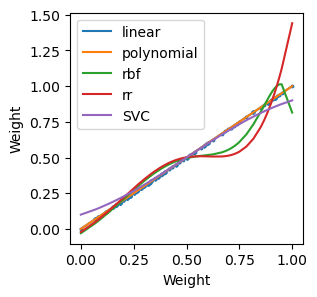

=== r2 ===
linear r2: 1.0
polynomial r2: 1.0
rbf r2: 0.9597768927270557
rr r2: 0.9075199433873491
svc r2: 0.9844975051988282
=== mse ===
linear mse: 0.000000
polynomial mse: 0.000000
rbf mse: 0.002605
rr mse: 0.005990
svc rdf mse: 0.001004


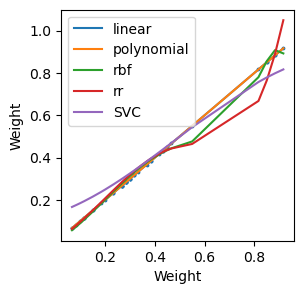

=== r2 ===
linear r2: 1.0
polynomial r2: 1.0
rbf r2: 0.9945277715288973
rr r2: 0.9710790075144786
svc r2: 0.9488993343852712
=== mse ===
linear mse: 0.000000
polynomial mse: 0.000000
rbf mse: 0.000295
rr mse: 0.001561
svc rdf mse: 0.002758


In [24]:
#Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage  Squat_PR  Deadlift_PR   Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
go_train_by_col('Weight','Weight')

Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVC Best Params: {'C': 10, 'gamma': 1}
Best alpha: 0.01


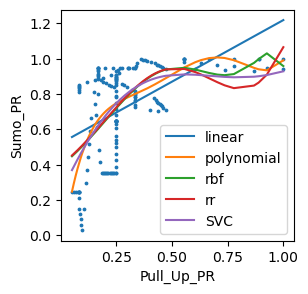

=== r2 ===
linear r2: 0.2631436153939818
polynomial r2: 0.3722285584515024
rbf r2: 0.33658392471957277
rr r2: 0.3267066402497668
svc r2: 0.3537952214454396
=== mse ===
linear mse: 0.048049
polynomial mse: 0.040936
rbf mse: 0.043260
rr mse: 0.043904
svc rdf mse: 0.042138


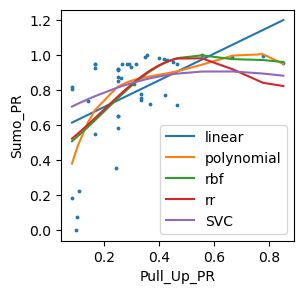

=== r2 ===
linear r2: 0.25746109741081924
polynomial r2: 0.4135442774215131
rbf r2: 0.35646184460148866
rr r2: 0.3412118480934607
svc r2: 0.21037018489846537
=== mse ===
linear mse: 0.047602
polynomial mse: 0.037596
rbf mse: 0.041255
rr mse: 0.042233
svc rdf mse: 0.050621


In [25]:
go_train_by_col('Pull_Up_PR','Sumo_PR')

Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVC Best Params: {'C': 10, 'gamma': 10}
Best alpha: 0.01


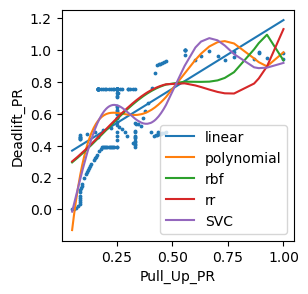

=== r2 ===
linear r2: 0.4183204441550953
polynomial r2: 0.6048925090706356
rbf r2: 0.43283863105165477
rr r2: 0.40313591073367916
svc r2: 0.6149670951981622
=== mse ===
linear mse: 0.036555
polynomial mse: 0.024830
rbf mse: 0.035643
rr mse: 0.037509
svc rdf mse: 0.024197


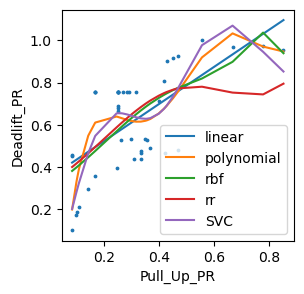

=== r2 ===
linear r2: 0.4144610492886307
polynomial r2: 0.5581728222795718
rbf r2: 0.42417741288988675
rr r2: 0.3641443288420356
svc r2: 0.5717241551790253
=== mse ===
linear mse: 0.031323
polynomial mse: 0.023635
rbf mse: 0.030803
rr mse: 0.034014
svc rdf mse: 0.022910


In [26]:
go_train_by_col('Pull_Up_PR','Deadlift_PR')

Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVC Best Params: {'C': 100, 'gamma': 10}
Best alpha: 1e-06


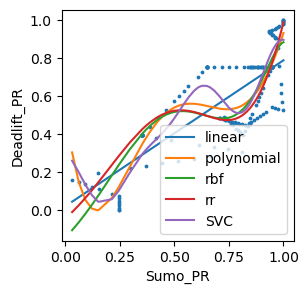

=== r2 ===
linear r2: 0.6124779166967547
polynomial r2: 0.7135315718340591
rbf r2: 0.6755056640926378
rr r2: 0.6478444702638899
svc r2: 0.727427004392891
=== mse ===
linear mse: 0.024353
polynomial mse: 0.018003
rbf mse: 0.020392
rr mse: 0.022131
svc rdf mse: 0.017130


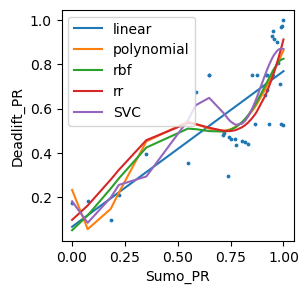

=== r2 ===
linear r2: 0.5924560271208998
polynomial r2: 0.6789796671276602
rbf r2: 0.6768252904797852
rr r2: 0.6524908540900185
svc r2: 0.6901645895751758
=== mse ===
linear mse: 0.021801
polynomial mse: 0.017173
rbf mse: 0.017288
rr mse: 0.018589
svc rdf mse: 0.016574


In [27]:
go_train_by_col('Sumo_PR','Deadlift_PR')

Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVC Best Params: {'C': 0.1, 'gamma': 1}
Best alpha: 1000000.0


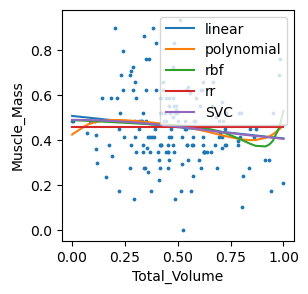

=== r2 ===
linear r2: 0.015606178928215364
polynomial r2: 0.02345246438925741
rbf r2: 0.021806391807594916
rr r2: 2.0992135918440624e-08
svc r2: 0.01759564463695984
=== mse ===
linear mse: 0.026956
polynomial mse: 0.026742
rbf mse: 0.026787
rr mse: 0.027384
svc rdf mse: 0.026902


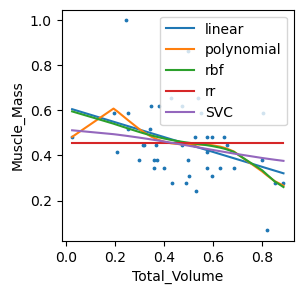

=== r2 ===
linear r2: 0.14374721397447887
polynomial r2: 0.17991835266584233
rbf r2: 0.1551672611687276
rr r2: 2.3471283028264622e-08
svc r2: 0.10986887703355719
=== mse ===
linear mse: 0.022643
polynomial mse: 0.021686
rbf mse: 0.022341
rr mse: 0.026444
svc rdf mse: 0.023539


In [28]:
#Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage  Squat_PR  Deadlift_PR   Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
go_train_by_col('Total_Volume','Muscle_Mass')

Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVC Best Params: {'C': 1, 'gamma': 10}
Best alpha: 0.001


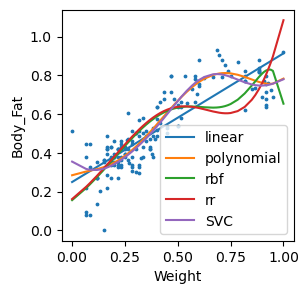

=== r2 ===
linear r2: 0.7316093453334913
polynomial r2: 0.8136860096516232
rbf r2: 0.6783810530959025
rr r2: 0.6373279379979038
svc r2: 0.8130183184761505
=== mse ===
linear mse: 0.010496
polynomial mse: 0.007286
rbf mse: 0.012578
rr mse: 0.014183
svc rdf mse: 0.007312


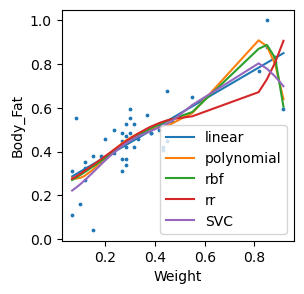

=== r2 ===
linear r2: 0.6781037147652891
polynomial r2: 0.7351076919199182
rbf r2: 0.7373993085638224
rr r2: 0.6184904091641097
svc r2: 0.6968997992196662
=== mse ===
linear mse: 0.011251
polynomial mse: 0.009258
rbf mse: 0.009178
rr mse: 0.013334
svc rdf mse: 0.010594


In [29]:
#Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage  Squat_PR  Deadlift_PR   Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume
go_train_by_col('Weight','Body_Fat')

Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVC Best Params: {'C': 10, 'gamma': 10}
Best alpha: 0.01


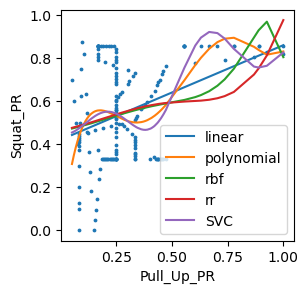

=== r2 ===
linear r2: 0.13838726224021503
polynomial r2: 0.19344340805093108
rbf r2: 0.12660022895967826
rr r2: 0.1012499748355924
svc r2: 0.21515885661300294
=== mse ===
linear mse: 0.042807
polynomial mse: 0.040072
rbf mse: 0.043393
rr mse: 0.044652
svc rdf mse: 0.038993


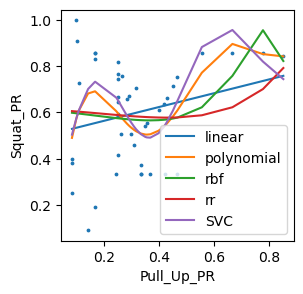

=== r2 ===
linear r2: 0.0533071805141605
polynomial r2: 0.19489063876885548
rbf r2: 0.10796914966679338
rr r2: 0.0644723743161395
svc r2: 0.16840767604982732
=== mse ===
linear mse: 0.045170
polynomial mse: 0.038414
rbf mse: 0.042561
rr mse: 0.044637
svc rdf mse: 0.039678


In [30]:
go_train_by_col('Pull_Up_PR','Squat_PR')

Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVC Best Params: {'C': 0.1, 'gamma': 10}
Best alpha: 0.01


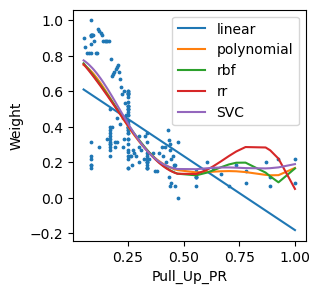

=== r2 ===
linear r2: 0.379453975027929
polynomial r2: 0.5231616378357999
rbf r2: 0.5185991245031318
rr r2: 0.5065986483685962
svc r2: 0.5184451020573959
=== mse ===
linear mse: 0.040192
polynomial mse: 0.030884
rbf mse: 0.031180
rr mse: 0.031957
svc rdf mse: 0.031190


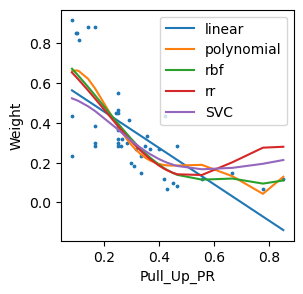

=== r2 ===
linear r2: 0.4410135465632843
polynomial r2: 0.577608782463422
rbf r2: 0.5614001588242513
rr r2: 0.5297614743588711
svc r2: 0.475352562725308
=== mse ===
linear mse: 0.030175
polynomial mse: 0.022801
rbf mse: 0.023676
rr mse: 0.025384
svc rdf mse: 0.028321


In [31]:
go_train_by_col('Pull_Up_PR','Weight')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC Best Params: {'C': 10, 'gamma': 0.1}


c:\Users\Tim\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


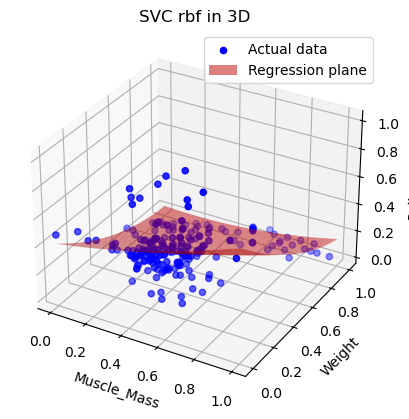

mse: 0.01808110157634213


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

df = combine_df
#print(df.keys)
#Date    Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage  Squat_PR  Deadlift_PR   Sumo_PR  Bench_Press_PR  Pull_Up_PR  Chest_Total_Volume  Back_Total_Volume  Legs_Total_Total  Total_Volume

# x1 = 'Sumo_PR'
# x2 = 'Deadlift_PR'
# y1 = 'Pull_Up_PR'

x1 = 'Muscle_Mass'
x2 = 'Weight'
y1 = 'Pull_Up_PR'

# 定義自變數和應變數
X = df[[x1, x2]]
y = df[y1]

# == RBF==
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X, y)

# ==使用多項式特徵和L2正規化==
degree = 2  # 多項式次數
alpha = 0.01  # 正規化參數
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
model.fit(X, y)

#svc rbf
param_grid = {
                'C': [0.1, 1, 10, 100],
                'gamma': [0.01, 0.1, 1, 10]
             }
svr_model = SVR(kernel='rbf')
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X, y.ravel())
best_params = grid_search.best_params_
print('SVC Best Params:', best_params)
svr_model = SVR(kernel='rbf', gamma=best_params['gamma'], C=best_params['C'])
svr_model.fit(X, y.ravel())
model = svr_model

# ==創建並擬合多元迴歸模型==
# model = LinearRegression()
# model.fit(X, y)

# 產生網格點
x1_range = np.linspace(min(df[x1]), max(df[x1]), 100)
x2_range = np.linspace(min(df[x2]), max(df[x2]), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# 產生對應的預測值
y_pred_mesh = model.predict(np.c_[x1_mesh.ravel(), x2_mesh.ravel()])
y_pred_mesh = y_pred_mesh.reshape(x1_mesh.shape)

# 繪製3D散點圖
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y1], c='blue', marker='o', label='Actual data')

# 繪製3D迴歸平面
ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, color='red', alpha=0.5, label='Regression plane')

# 添加標籤和標題
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel(y1)
ax.set_title('SVC rbf in 3D')
#ax.set_title('Multiple Linear Regression in 3D')

# 顯示圖形
plt.legend()
plt.show()

# 使用模型進行預測
y_pred = model.predict(X)
# 計算均方誤差
mse = mean_squared_error(y, y_pred)
print('mse:', mse)

c:\Users\Tim\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


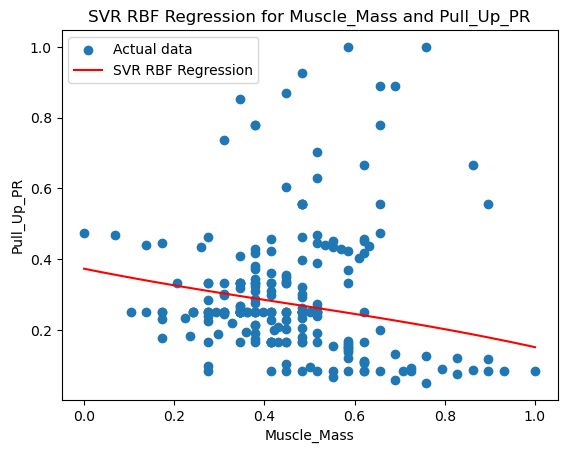

c:\Users\Tim\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


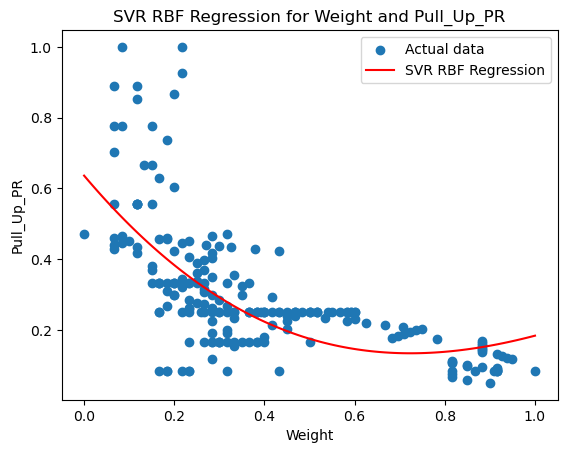

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 假設 combine_df 是你的 DataFrame
df = combine_df

x1 = 'Muscle_Mass'
x2 = 'Weight'
y1 = 'Pull_Up_PR'

# 定義自變數和應變數
X1 = df[[x1]]
X2 = df[[x2]]
y = df[y1]

# 使用 SVR 模型
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X1, y)

# 產生網格點
x1_range = np.linspace(min(df[x1]), max(df[x1]), 100)
x1_mesh, = np.meshgrid(x1_range)

# 產生對應的預測值
X1_mesh = np.c_[x1_mesh.ravel()]
y_pred_mesh = svr_rbf.predict(X1_mesh)

# 繪製散點圖和迴歸線
plt.scatter(df[x1], df[y1], label='Actual data')
plt.plot(x1_mesh, y_pred_mesh, color='red', label='SVR RBF Regression')
plt.xlabel(x1)
plt.ylabel(y1)
plt.title(f'SVR RBF Regression for {x1} and {y1}')
plt.legend()
plt.show()

# 使用 SVR 模型
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X2, y)

# 產生網格點
x2_range = np.linspace(min(df[x2]), max(df[x2]), 100)
x2_mesh, = np.meshgrid(x2_range)

# 產生對應的預測值
X2_mesh = np.c_[x2_mesh.ravel()]
y_pred_mesh = svr_rbf.predict(X2_mesh)

# 繪製散點圖和迴歸線
plt.scatter(df[x2], df[y1], label='Actual data')
plt.plot(x2_mesh, y_pred_mesh, color='red', label='SVR RBF Regression')
plt.xlabel(x2)
plt.ylabel(y1)
plt.title(f'SVR RBF Regression for {x2} and {y1}')
plt.legend()
plt.show()

In [34]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 假設 combine_df 是你的 DataFrame
df = combine_df

x1 = 'Sumo_PR'
x2 = 'Squat_PR'
y1 = 'Pull_Up_PR'

# 定義自變數和應變數
X = df[[x1, x2]]
y = df[y1]

# 對自變數進行標準化
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# 對應變數進行標準化
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# 使用 SVR 模型
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_scaled, y_scaled)

# 產生網格點
x1_range = np.linspace(min(X_scaled[:, 0]), max(X_scaled[:, 0]), 100)
x2_range = np.linspace(min(X_scaled[:, 1]), max(X_scaled[:, 1]), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

# 產生對應的預測值
y_pred_mesh_scaled = svr_rbf.predict(X_mesh)
y_pred_mesh = scaler_y.inverse_transform(y_pred_mesh_scaled.reshape(-1, 1)).ravel()
y_pred_mesh = y_pred_mesh.reshape(x1_mesh.shape)

# 繪製3D散點圖和迴歸平面
fig = go.Figure()

# 數據散點圖
fig.add_trace(go.Scatter3d(x=X_scaled[:, 0], y=X_scaled[:, 1], z=y_scaled,
                           mode='markers', marker=dict(size=5), name='Actual data'))

# 迴歸平面
fig.add_trace(go.Surface(x=x1_mesh, y=x2_mesh, z=y_pred_mesh, opacity=0.7, name='Regression plane'))

# 設置佈局和標籤
fig.update_layout(scene=dict(xaxis_title=x1, yaxis_title=x2, zaxis_title=y1),
                  title=f'SVR RBF Regression in 3D for {x1}, {x2}, and {y1}')

# 顯示圖形
fig.show()